# Predicting heart disease


This notebook is an attempt to the pridict  wether a patient is having heart disease using various python based Machine-learning and Data-science libraries


We are going to take following approach
1. Problem Defination
2. Data collections
3. Evaluation
4. Features 
5. Modeling 
6. Experimentation



## 1. Problem Defination
 > Given clinical parameters about a patient can we predict wether or not they have heart diseas?


## 2. Data
The orignal data came from the  UCI Machine learning Repository https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version available on kaggle https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation 
> if we can predict with 95% of accuracy wether a patient is having heart disease or not during a proof of concept , we will persue the project


## 4. Features 

This is where you will get the diffrent information about the features in your  data. you can do this doing your own research or talking to a subject matter expert 

**Create Data Dictionary**

Only 14 attributes used:
1. (age)=                 age in years
2. (sex)=                 sex (1 = male; 0 = female)
3. (cp)=                  chest pain type-- Value 1: typical angina
                                            Value 2: atypical angina
                                            Value 3: non-anginal pain
                                            Value 4: asymptomatic
4. (trestbps)=            resting blood pressure (in mm Hg on admission to the hospital)
5. (chol)=                serum cholestoral in mg/dl
6. (fbs)=                 (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg)=             resting electrocardiographic results -- Value 0: normal
                                                                  Value 1: having ST-T wave abnormality                                                                                                   (T wave inversions and/or ST elevation                                                                                          or depression of > 0.05 mV)
                                                                  Value 2: showing probable or definite left ventricular
                                                                           hypertrophy by Estes' criteria
8. (thalach)=             maximum heart rate achieved
9. (exang)=               exercise induced angina (1 = yes; 0 = no)
10. (oldpeak)=            ST depression induced by exercise relative to rest
11. (slope)=              the slope of the peak exercise ST segment-- Value 1: upsloping
                                                                      Value 2: flat
                                                                      Value 3: downsloping
12. (ca)=                  number of major vessels (0-3) colored by flourosop
13. (thal)=                3 = normal; 6 = fixed defect; 7 = reversable defect
14. (target) (the predicted attribute)=        diagnosis of heart disease (angiographic disease status)
                                            Value 0: < 50% diameter narrowing
                                            Value 1: > 50% diameter narrowing
                                            (in any major vessel: attributes 59 through 68 are vessels)


In [1]:
# Import all the tools we need 

# Regular data analysis tools
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
           
# we want to plot the data into our notebook

%matplotlib inline 

# models from scikitlearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier


# models evaluations
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import recall_score,f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve



## Load data 




In [2]:
df= pd.read_csv("heart-disease.csv")
df.shape


(303, 14)

## Data Exploration 
The goal is here to find more about data and  nbecome a subject matter expert with the data you're working with :

* What question(s) are ypu tring to solve?
* What type of data do we have and how do we treat the data?
* What is missing from the data and how to deal with it ?
* Where are the outliers and why should we care about them ?
* how you can add, change or remove features to get more out of your data ?




In [3]:
# finding how many of the classes are there 
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

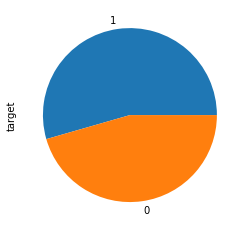

In [4]:
#visualizing the classes in form pie chart
df["target"].value_counts().plot(kind="pie" );

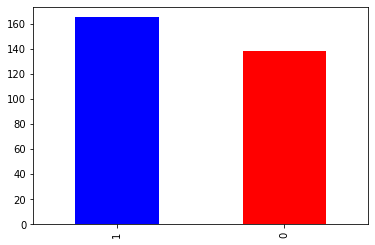

In [5]:
# visualizing the classes in form of bar graph 
df["target"].value_counts().plot(kind="bar", color=["Blue", "Red"] );

In [6]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Make a correlation matrix
the correlation of the features with every features 


In [7]:
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


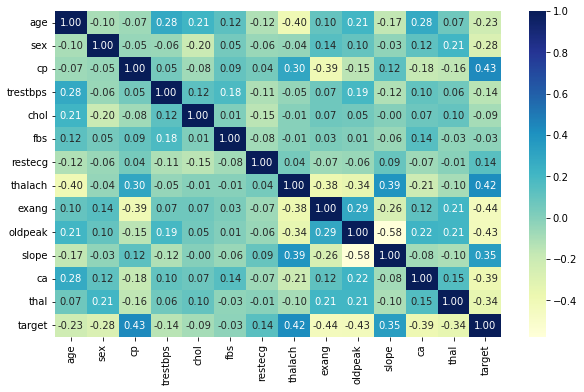

In [8]:
# creating a visuals of a correlation matrix
fig, ax= plt.subplots(figsize=(10,6))
ax= sns.heatmap(corr_matrix,
               cmap="YlGnBu",
               annot=True,
                fmt=".2f",)

### Modeling 

In [9]:
# createing the x and y  datasets 
x=df.drop("target", axis=1)
y=df["target"]

In [10]:
# spliting the data into train and test sets 
x_train, x_test, y_train, y_test= train_test_split(x,
                                                    y, 
                                                    test_size=0.2)

We have our train and test splits 

we are going to train our model to find the paterns in the dataset 

We are going to use 3 estimators/algorithms/models for our data sets 
1. KNeighborsClassifier
2. LogisticRegression
3. RandomForestClassifier

In [11]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2


In [12]:
y_train

53     1
23     1
272    0
36     1
47     1
      ..
183    0
94     1
257    0
81     1
138    1
Name: target, Length: 242, dtype: int64

In [13]:
# create a dictionary and put models into it 
models={"KNN":KNeighborsClassifier(),
        "LR": LogisticRegression(), 
        "RFC": RandomForestClassifier()}

# create a function for soring and fitting a model 

def fit_score(models, x_train, y_train, x_test, y_test):
    '''
    fit the model and get the score of the model
    parameters:
    model = List of the models 
    x_train =  x training data 
    y_train =  y training data 
    x_test = x testing data 
    y_test = y testing data 
    '''
    # create a random seed (42)
    np.random.seed(42)
    # make a empty dictionary to keep model scores
    model_scores={}
    
    # make a loop of the models 
    for name, model in models.items():
        # fit the models to the data 
        model.fit(x_train, y_train)
        
        # score of the model 
        model_scores[name]= model.score(x_test, y_test)
    return model_scores    

In [14]:
# get a scores of the models 
model_scores =fit_score(models= models, x_train= x_train, y_train= y_train, x_test= x_test, y_test= y_test)
model_scores

C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6065573770491803,
 'LR': 0.8524590163934426,
 'RFC': 0.8688524590163934}

<AxesSubplot:>

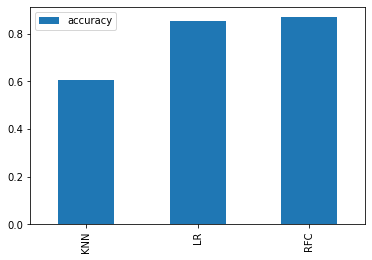

In [15]:
# visualizing the scores of the baseline models 
compare_models= pd.DataFrame(model_scores, index= ["accuracy"])
compare_models.T.plot.bar()

By the comparison of the baseline models through the bar graph we can eliminate the KNeighboursClassifier from the models and can further expiriment with the other 2 doing hyperparameter tunings.

we know that the baseline models are not always what we should based on 
we will be looking at the following 
* Hyperparameter Tuning 
* confusion matrix
* Crossvalidation scores
* percision scores 
* recall scores 
* f1 scores 
* features important 
* ROC curve
* Area Under Curve (AUC)

### Hyper parameter Tuning (by hand)

In [16]:
# lets tune KNN by hand 
# creating the empty lists to store the scores of the hyperparameter tunings 

train_scores =[]
test_scores=[]

# creting a loop for the model hyperparameter
np.random.seed(42)
# create a list of diffrent values for n_neighbors
neighbours=np.arange(1,21)
# setup knn instance 
knn= KNeighborsClassifier()

# looping for the n_neighbors in knn 
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(x_train, y_train)
    
    # update the train_scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the test_score list 
    test_scores.append(knn.score(x_test, y_test))




In [17]:
test_scores 

[0.5245901639344263,
 0.5901639344262295,
 0.5573770491803278,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803,
 0.6557377049180327,
 0.6557377049180327,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6229508196721312,
 0.6721311475409836]

In [18]:
train_scores

[1.0,
 0.8016528925619835,
 0.7644628099173554,
 0.7644628099173554,
 0.7644628099173554,
 0.7603305785123967,
 0.7231404958677686,
 0.743801652892562,
 0.6983471074380165,
 0.6776859504132231,
 0.6942148760330579,
 0.6818181818181818,
 0.6900826446280992,
 0.6859504132231405,
 0.6735537190082644,
 0.6942148760330579,
 0.6859504132231405,
 0.6983471074380165,
 0.6859504132231405,
 0.7024793388429752]

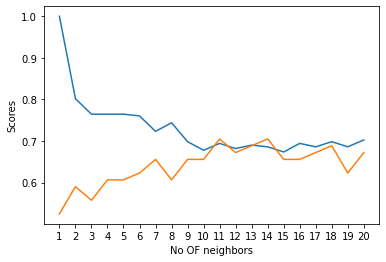

In [19]:
# plotiing the train and test scores of the knn classifier

plt.plot(neighbours, train_scores, label="train_score")
plt.plot(neighbours, test_scores, label = "test_score")
plt.xticks(np.arange(1,21,1));
plt.xlabel("No OF neighbors")
plt.ylabel("Scores");

### Hyperparameter tuning with RandomizedSearchCV

 we are using only 
 * RandomForestClassifier
 * LogisticRegression

for tuning the hyper parameters 

In [20]:
# creating hyperparameter grid for the logisticRegression Model 
log_re_grid={"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}

# creating hyperparameter grid for the RandomForestClassifier model
rfc_grid= {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None, 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [21]:
# LogisticRegression

Now we have our hyperparameter grid ready lets tune them with the help of RandomizedSearchCV

In [22]:
# Tune LogisticRegression model

np.random.seed(42)

rscv_log_re= RandomizedSearchCV( LogisticRegression(),
                                 param_distributions= log_re_grid,
                                 cv=5,
                                 n_iter =20,
                                 verbose=True)
# fitting the training sets 
rscv_log_re.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
rscv_log_re.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [24]:
rscv_log_re.score(x_test, y_test)

0.8360655737704918

lets do the same for the random forest classification model


In [25]:
# creating a random seed 
np.random.seed(42)

rscv_rfc= RandomizedSearchCV(RandomForestClassifier(), 
                            param_distributions= rfc_grid,
                            cv=5, 
                            n_iter=20,
                            verbose=True)
# fitting the training sets 
rscv_rfc.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [26]:
rscv_rfc.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [27]:
rscv_rfc.score(x_test,y_test)

0.819672131147541

since our LogisticRegression model is doing good so far so we will use GridSearchCV on the LogisticRegression Model



In [33]:
# seting the randomseed 
np.random.seed(42)
gscv_lr= GridSearchCV(LogisticRegression(),
                      param_grid=log_re_grid,
                      cv=5,
                      verbose=True)

# fitting the training sets
gscv_lr.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
gscv_lr.best_params_



{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [35]:
gscv_lr.score(x_test, y_test)

0.8360655737704918

## Evaluating our tuned model beyond accuracy

* confusion Matrix
* classification report
* percision score 
* ROC 
* AUC
* Recall score
* Fi score 
* Features important 

it would be best to use crossvalidation where ever possible


to make comparison and to evaluate our model we need to first predict with the model 

In [36]:
y_preds= gscv_rfc.predict(x_test)

y_preds

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [37]:
y_test

33     1
198    0
216    0
284    0
55     1
      ..
203    0
103    1
169    0
143    1
246    0
Name: target, Length: 61, dtype: int64

#### plotting ROC curve and AUC(Area Under Curve)

C:\Users\JADHAV\Desktop\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


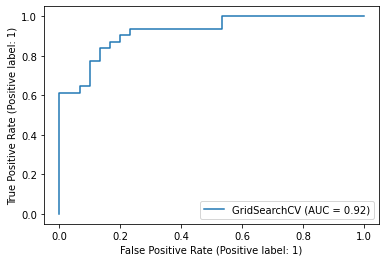

In [40]:
plot_roc_curve(gscv_lr, x_test, y_test);

### Classification Report

In [42]:
print(classification_report(y_true = y_test,
                     y_pred = y_preds))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



### Confusion Matrix



In [43]:
# printing confisusion matrix
print(confusion_matrix(y_test, y_preds))

[[22  8]
 [ 2 29]]


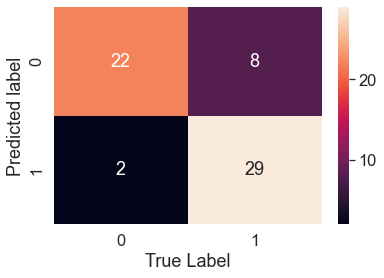

In [53]:
# to visualize the confusion matrix


fig, ax = plt.subplots()
ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                annot= True)

plt.xlabel("True Label")
plt.ylabel("Predicted label")
sns.set(font_scale=3)

### Precision_Score , Recall_score and F1_score using cross_validation_score  

In [54]:
# the best params of the model 
gscv_lr.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [57]:
#creating a variable of model called clf
clf= LogisticRegression(C= 0.23357214690901212,
                        solver= 'liblinear')

In [59]:
# precision score of the model 
pre_score= cross_val_score(clf,
                          x,
                          y,
                          cv=5, 
                          scoring= 'precision')
pre_score

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [60]:
pre_score_mean= np.mean(pre_score)
pre_score_mean

0.8215873015873015

In [61]:
# accuracy score of the model 
acc_score= cross_val_score(clf,
                           x,
                           y,
                           cv=5,
                           scoring='accuracy')
acc_score

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [62]:
acc_score_mean= np.mean(acc_score)
acc_score_mean

0.8479781420765027

In [63]:
# recall score of the model
recall_score= cross_val_score(clf,
                             x,
                             y,
                             cv=5,
                             scoring='recall')
recall_score

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [65]:
recall_score_mean=np.mean(recall_score)
recall_score_mean

0.9272727272727274

In [66]:
# F1 score of the model 
f1_score= cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='f1')
f1_score

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [68]:
f1_score_mean= np.mean(f1_score)
f1_score_mean

0.8705403543192143

In [77]:
# visualizing the scores (accuracy, precision, recall, f1 scores)using bar graph 
eval_grid=pd.DataFrame({"acc": acc_score_mean,
           "precision": pre_score_mean,
           "recall": recall_score_mean,
           "f1": f1_score_mean},
                      index=[1])
eval_grid

,acc,precision,recall,f1
1,0.847978,0.821587,0.927273,0.87054


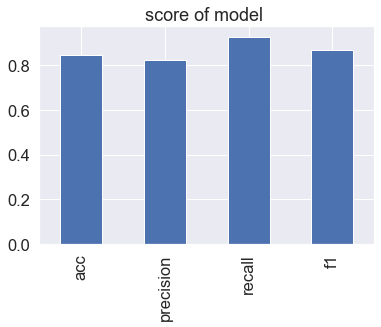

In [90]:
eval_grid.T.plot.bar(title="score of model ",
                     legend = False);
sns.set(font_scale=1.5)

## Features important 
feature importance is the another way of asking which feature contributes to the outcome and how did the contribute?



In [91]:
# creating the instataneous machine model with the best parameter 
# we have created the instantaneous model before wiht the name of clf

In [92]:
# fitting the model 
clf.fit(x_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [93]:
# check coefficient of the model using coef_
clf.coef_

array([[ 0.00461206, -1.0392585 ,  0.67283355, -0.01146892, -0.00225963,
        -0.16948726,  0.24424488,  0.02667979, -0.42298501, -0.50779371,
         0.29312395, -0.69652745, -0.60533242]])

In [97]:
feature_dict= dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.004612055787272051,
 'sex': -1.0392584994436769,
 'cp': 0.6728335487230206,
 'trestbps': -0.011468918410673618,
 'chol': -0.0022596265290997413,
 'fbs': -0.1694872586082275,
 'restecg': 0.2442448768222099,
 'thalach': 0.026679786418404017,
 'exang': -0.4229850093556526,
 'oldpeak': -0.5077937132323685,
 'slope': 0.29312395309322953,
 'ca': -0.6965274481670622,
 'thal': -0.6053324155567115}

In [100]:
feature_df= pd.DataFrame(feature_dict, index=[1] )
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,0.004612,-1.039258,0.672834,-0.011469,-0.00226,-0.169487,0.244245,0.02668,-0.422985,-0.507794,0.293124,-0.696527,-0.605332


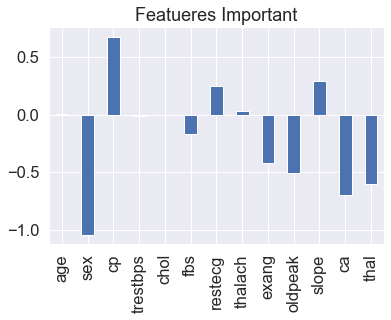

In [107]:
feature_df.T.plot.bar(title = "Featueres Important" ,legend= False);